<a href="https://colab.research.google.com/github/bbarthougatica/ChmInf/blob/Toxic_data/cheminf_latin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cheminformatics & drug design - Project**


RDKit is an open-source software toolkit for cheminformatics, designed to assist in the analysis and design of small molecules and chemical compounds. It provides a set of libraries and tools for the manipulation and analysis of molecular structures, molecular descriptors, molecular fingerprints, molecular similarity, molecular visualization, and more. The toolkit is widely used in academia, as well as in the pharmaceutical, biotech, and chemical industries for a variety of tasks such as virtual screening, lead optimization, and chemical database management.

In [44]:
# Install all libraries
!pip install numpy scipy matplotlib scikit-learn pandas rdkit xgboost deepchem mordred pycm

import pandas as pd
import deepchem as dc
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

Now we upload our selected Data Bases.

Per default, featurizer es ECFP, also known as circular fingerprints or as morgan generator

In [45]:
featurizer = dc.feat.CircularFingerprint(size=2048, radius=8)
tasks, datasets, transformers = dc.molnet.load_sider(featurizer=featurizer)
train_dataset, valid_dataset, test_dataset = datasets

[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerator
[14:36:53] DEPRECATION WARNING: please use MorganGenerat

In [46]:
print("Dataset:", "SIDER")
print("Number of tasks (side effect categories):", len(tasks))
print("Example task names:", tasks[:5])

Dataset: SIDER
Number of tasks (side effect categories): 27
Example task names: ['Hepatobiliary disorders', 'Metabolism and nutrition disorders', 'Product issues', 'Eye disorders', 'Investigations']


In [47]:
print([type(d) for d in datasets])

[<class 'deepchem.data.datasets.DiskDataset'>, <class 'deepchem.data.datasets.DiskDataset'>, <class 'deepchem.data.datasets.DiskDataset'>]


Load sider usually returns a tuple with three datasets, one for training, one for validation and one for test, that's why we need to unpack them for use. In our case, we keep all the data in the same dataset for now

In [48]:
tasks

['Hepatobiliary disorders',
 'Metabolism and nutrition disorders',
 'Product issues',
 'Eye disorders',
 'Investigations',
 'Musculoskeletal and connective tissue disorders',
 'Gastrointestinal disorders',
 'Social circumstances',
 'Immune system disorders',
 'Reproductive system and breast disorders',
 'Neoplasms benign, malignant and unspecified (incl cysts and polyps)',
 'General disorders and administration site conditions',
 'Endocrine disorders',
 'Surgical and medical procedures',
 'Vascular disorders',
 'Blood and lymphatic system disorders',
 'Skin and subcutaneous tissue disorders',
 'Congenital, familial and genetic disorders',
 'Infections and infestations',
 'Respiratory, thoracic and mediastinal disorders',
 'Psychiatric disorders',
 'Renal and urinary disorders',
 'Pregnancy, puerperium and perinatal conditions',
 'Ear and labyrinth disorders',
 'Cardiac disorders',
 'Nervous system disorders',
 'Injury, poisoning and procedural complications']

We are now working with DiskDataset, we need to convert to panda dataframe

In [49]:
# Convert to DataFrame
X_train = train_dataset.X #1024-bit molecular fingerprints
y_train = train_dataset.y #Side effect binary labels
ids_train = train_dataset.ids #SMILES


In [50]:
df = pd.DataFrame(y_train, columns=tasks)
df.insert(0, "SMILES", ids_train)

df.head()

,SMILES,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,C(CNCCNCCNCCN)N,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
1,Cl[Tl],0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,C[N+](C)(C)CC(CC(=O)O)O,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,C(CC(=O)O)CN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C(CC(=O)O)C(=O)CN,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0



We chose two Data Sets from the *Physiology Collection*.
We aim to study toxicity and adverse drug reaction properties and use classification tasks with them.
Both datasets are split into training, validation and test subsets following a 80/10/10 ratio and is recommended to do RANDOM splitting.

In this file, we will be looking at the Sider dataset


# Data Set: **SIDER**

* Database of marketed drugs and adverse drug reactions (ADR), grouped into 27 system organ classes.
*   Task type: Classification
*   Nº Tasks: 27
*   Recommended classification and regress metrics: Area Under Curve of Receiver Operating Characteristics
*   Nº Compounds: 1427
*   Prediction target: Adverce Drug Reaction



*You should perform appropriate data cleaning and preprocessing. This includes evaluating at least two different molecular featurization strategies, such as circular fingerprints (e.g., Morgan) and descriptor-based or graph-based representations.
Document any preprocessing decisions or challenges.*


**The path to a ML model.**

*   Define the task
*   Prepare data & split data
*   Choose the model
*   Train the model
*   Evaluate the model
*   Use the model




| Property     | Description                                                                      |
| ------------ | -------------------------------------------------------------------------------- |
| **Type**     | Supervised learning                                                              |
| **Sub-type** | Multi-label classification                                                       |
| **Input**    | Molecular features derived from SMILES                                           |
| **Output**   | Binary vector of 27 side effect indicators                                       |
| **Goal**     | Predict the presence (1) or absence (0) of each side effect for unseen molecules |


In this project, our goal is to develop a machine learning model that predicts physiological side effects of drug molecules based on their chemical structure.
Each molecule is represented by molecular descriptors derived from its SMILES notation, and the target output consists of 27 binary labels corresponding to physiological side effect categories.
This represents a multi-label classification problem, where each compound can be associated with multiple side effects simultaneously.

In drug discovery, predicting adverse side effects before clinical testing can:
Reduce the risk of toxicity in early drug candidates
Help prioritize safer compounds
Save significant time and cost in development
So, our proposed model essentially acts as a computational toxicity screener, a decision-support tool for medicinal chemists.

In [51]:
df.shape, df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 28 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   SMILES                                                               1141 non-null   object 
 1   Hepatobiliary disorders                                              1141 non-null   float64
 2   Metabolism and nutrition disorders                                   1141 non-null   float64
 3   Product issues                                                       1141 non-null   float64
 4   Eye disorders                                                        1141 non-null   float64
 5   Investigations                                                       1141 non-null   float64
 6   Musculoskeletal and connective tissue disorders                      1141 non-null   float64
 7   Gastro

((1141, 28), None)

In [52]:
print(df.isna().sum().sum(), "missing values total")
print(df.describe())

0 missing values total
       Hepatobiliary disorders  Metabolism and nutrition disorders  \
count              1141.000000                         1141.000000   
mean                  0.513585                            0.688869   
std                   0.500035                            0.463159   
min                   0.000000                            0.000000   
25%                   0.000000                            0.000000   
50%                   1.000000                            1.000000   
75%                   1.000000                            1.000000   
max                   1.000000                            1.000000   

       Product issues  Eye disorders  Investigations  \
count     1141.000000    1141.000000     1141.000000   
mean         0.014023       0.607362        0.795793   
std          0.117636       0.488552        0.403298   
min          0.000000       0.000000        0.000000   
25%          0.000000       0.000000        1.000000   
50%       

We want to clean all three datasets now, to properly prepare for the model

In [53]:
def dataset_to_df(dc_dataset, tasks):
    return pd.DataFrame({
        "SMILES": dc_dataset.ids
    }).assign(**{task: dc_dataset.y[:, i] for i, task in enumerate(tasks)})

# Convert all to dataframes for inspection
df_train = dataset_to_df(train_dataset, tasks)
df_valid = dataset_to_df(valid_dataset, tasks)
df_test  = dataset_to_df(test_dataset,  tasks)

print("Train:", df_train.shape, "Valid:", df_valid.shape, "Test:", df_test.shape)

Train: (1141, 28) Valid: (143, 28) Test: (143, 28)


In [54]:
def clean_invalid_smiles(df):
    df["mol"] = df["SMILES"].apply(Chem.MolFromSmiles)
    invalid = df["mol"].isna().sum()
    print(f"Invalid SMILES found: {invalid}")
    return df.dropna(subset=["mol"]).drop_duplicates(subset=["SMILES"]).reset_index(drop=True)

df_train = clean_invalid_smiles(df_train)
df_valid = clean_invalid_smiles(df_valid)
df_test  = clean_invalid_smiles(df_test)

[14:37:05] WARNING: not removing hydrogen atom without neighbors
[14:37:05] WARNING: not removing hydrogen atom without neighbors
[14:37:05] WARNING: not removing hydrogen atom without neighbors
[14:37:05] WARNING: not removing hydrogen atom without neighbors
[14:37:05] WARNING: not removing hydrogen atom without neighbors
[14:37:05] WARNING: not removing hydrogen atom without neighbors
[14:37:05] WARNING: not removing hydrogen atom without neighbors
[14:37:05] WARNING: not removing hydrogen atom without neighbors
[14:37:05] WARNING: not removing hydrogen atom without neighbors
[14:37:05] WARNING: not removing hydrogen atom without neighbors


Invalid SMILES found: 0
Invalid SMILES found: 0
Invalid SMILES found: 0


[14:37:05] WARNING: not removing hydrogen atom without neighbors
[14:37:05] WARNING: not removing hydrogen atom without neighbors
[14:37:05] WARNING: not removing hydrogen atom without neighbors


In [55]:
from sklearn.feature_selection import VarianceThreshold
X_train, y_train, features_train = train_dataset.X, train_dataset.y, train_dataset.ids
X_valid, y_valid, features_valid = valid_dataset.X, valid_dataset.y, valid_dataset.ids
X_test,  y_test, features_test  = test_dataset.X,  test_dataset.y, test_dataset.ids



In [61]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
X_train.shape, X_valid.shape, X_test.shape

((1141, 2048), (143, 2048), (143, 2048))

In [62]:
selector = VarianceThreshold(threshold=0.0)
X_train = selector.fit_transform(X_train)
X_valid = selector.transform(X_valid)
X_test  = selector.transform(X_test)

print("Remaining features:", X_train.shape)

Remaining features: (1141, 2048)


We had no invalid smiles

We being by properly preparing our data. In this first case, we are using circular fingerpints, which are binary. So for this particular scenario, we don't need to scale our data and can proceed directly with our model. In other scenarios, for example while using MACCSKeysFingerprint, it is required to scale our data.

Random Forests handle high-dimensional, sparse, nonlinear data very well.
They automatically capture interactions between features (no need for feature scaling or transformations).
They’re robust to noise, handle imbalanced labels decently, and require little hyperparameter tuning to get reasonable performance.

In [65]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=0,
    n_jobs=-1 # allows for parallel computation

)


In [67]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import numpy as np
results = []

for i, task in enumerate(tasks):
    rf.fit(X_train, y_train[:, i])
    y_pred_proba = rf.predict_proba(X_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid[:, i], y_pred_proba)
    results.append((task, roc_auc))

# Sort by performance
results = sorted(results, key=lambda x: x[1], reverse=True)
for task, auc in results[:5]:
    print(f"{task}: ROC-AUC = {auc:.3f}")

Nervous system disorders: ROC-AUC = 0.716
Eye disorders: ROC-AUC = 0.711
Reproductive system and breast disorders: ROC-AUC = 0.694
Hepatobiliary disorders: ROC-AUC = 0.693
Blood and lymphatic system disorders: ROC-AUC = 0.671


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import numpy as np

# Create the base classifier
base_rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Wrap in a MultiOutputClassifier
multi_rf = MultiOutputClassifier(base_rf, n_jobs=-1)

# Fit on all tasks at once
multi_rf.fit(X_train, y_train)

# Predict probabilities (list of arrays, one per task)
y_pred_list = [est.predict_proba(X_valid)[:, 1] for est in multi_rf.estimators_]
y_pred_proba = np.vstack(y_pred_list).T

# Compute metrics
roc_aucs = []
for i, task in enumerate(tasks):
    mask = ~np.isnan(y_valid[:, i])
    roc_auc = roc_auc_score(y_valid[mask, i], y_pred_proba[mask, i])
    roc_aucs.append(roc_auc)

print("Mean ROC-AUC across tasks:", np.nanmean(roc_aucs))


Mean ROC-AUC across tasks: 0.5760175997326843


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import numpy as np
import pandas as pd

# Define and train the model
base_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

multi_rf = MultiOutputClassifier(base_rf, n_jobs=-1)
multi_rf.fit(X_train, y_train)

# Predict on validation set
y_pred_proba = np.zeros_like(y_valid, dtype=float)
y_pred_binary = np.zeros_like(y_valid, dtype=int)

for i, estimator in enumerate(multi_rf.estimators_):
    y_pred_proba[:, i] = estimator.predict_proba(X_valid)[:, 1]
    y_pred_binary[:, i] = (y_pred_proba[:, i] > 0.5).astype(int)

#Compute metrics per task
results = []

for i, task in enumerate(tasks):
    roc_auc = roc_auc_score(y_valid[:, i], y_pred_proba[:, i])
    f1 = f1_score(y_valid[:, i], y_pred_binary[:, i])
    acc = accuracy_score(y_valid[:, i], y_pred_binary[:, i])

    results.append({
        "Task": task,
        "ROC-AUC": roc_auc,
        "F1-score": f1,
        "Accuracy": acc
    })

# --- 4. Create summary DataFrame ---
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

# --- 5. Compute global averages ---
mean_metrics = results_df[["ROC-AUC", "F1-score", "Accuracy"]].mean().to_dict()
print("Average metrics across all tasks:")
for k, v in mean_metrics.items():
    print(f"{k}: {v:.3f}")




Average metrics across all tasks:
ROC-AUC: 0.576
F1-score: 0.641
Accuracy: 0.789


In [87]:

display(results_df.head(28))

,Task,ROC-AUC,F1-score,Accuracy
0,Reproductive system and breast disorders,0.717570,0.721649,0.622378
1,Ear and labyrinth disorders,0.698161,0.686747,0.636364
2,Eye disorders,0.693568,0.809302,0.713287
3,Nervous system disorders,0.686170,0.992958,0.986014
4,Hepatobiliary disorders,0.686044,0.732984,0.643357
5,Immune system disorders,0.656250,0.860558,0.755245
6,Blood and lymphatic system disorders,0.644409,0.785388,0.671329
7,Endocrine disorders,0.641922,0.000000,0.804196
8,Cardiac disorders,0.632658,0.842975,0.734266
9,Psychiatric disorders,0.628171,0.875502,0.783217


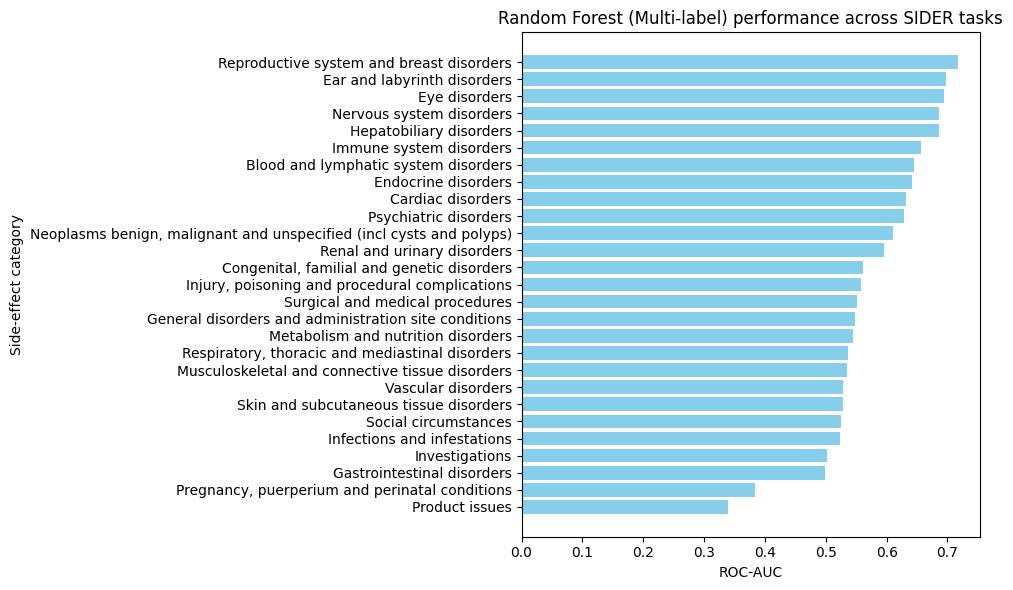

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(results_df["Task"], results_df["ROC-AUC"], color="skyblue")
plt.xlabel("ROC-AUC")
plt.ylabel("Side-effect category")
plt.title("Random Forest (Multi-label) performance across SIDER tasks")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The multi-output Random Forest achieved an average ROC-AUC of 0.576 across 27 SIDER side-effect categories. While accuracy appears high (0.789), this is misleading due to the extreme imbalance of positive and negative examples. The model performs moderately well on more common side effects (e.g., reproductive, eye, immune disorders) but fails to detect rare adverse events (e.g., pregnancy, product issues), as indicated by F1-scores of zero. These results highlight that class imbalance is the primary challenge in predictive modeling for side-effect prediction.

In [90]:

# --- 1. Predict on test set ---
y_pred_proba_test = np.zeros_like(y_test, dtype=float)
y_pred_binary_test = np.zeros_like(y_test, dtype=int)

for i, estimator in enumerate(multi_rf.estimators_):
    y_pred_proba_test[:, i] = estimator.predict_proba(X_test)[:, 1]
    y_pred_binary_test[:, i] = (y_pred_proba_test[:, i] > 0.5).astype(int)

# --- 2. Compute metrics per task ---
results_test = []

for i, task in enumerate(tasks):
    roc_auc = roc_auc_score(y_test[:, i], y_pred_proba_test[:, i])
    f1 = f1_score(y_test[:, i], y_pred_binary_test[:, i])
    acc = accuracy_score(y_test[:, i], y_pred_binary_test[:, i])

    results_test.append({
        "Task": task,
        "ROC-AUC": roc_auc,
        "F1-score": f1,
        "Accuracy": acc
    })

# --- 3. Create summary DataFrame ---
results_test_df = pd.DataFrame(results_test)
results_test_df = results_test_df.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

# --- 4. Compute average metrics ---
mean_metrics_test = results_test_df[["ROC-AUC", "F1-score", "Accuracy"]].mean().to_dict()
print("Average metrics on test set:")
for k, v in mean_metrics_test.items():
    print(f"{k}: {v:.3f}")

# --- 5. Display top results ---
display(results_test_df.head(27))


Average metrics on test set:
ROC-AUC: 0.613
F1-score: 0.643
Accuracy: 0.773


,Task,ROC-AUC,F1-score,Accuracy
0,Reproductive system and breast disorders,0.761538,0.750000,0.692308
1,Product issues,0.741007,0.000000,0.965035
2,Investigations,0.714222,0.928302,0.867133
3,Skin and subcutaneous tissue disorders,0.708637,0.978571,0.958042
4,Eye disorders,0.693548,0.717949,0.615385
5,Nervous system disorders,0.690713,0.967509,0.937063
6,Blood and lymphatic system disorders,0.687550,0.788177,0.699301
7,Gastrointestinal disorders,0.685950,0.963504,0.930070
8,Renal and urinary disorders,0.667474,0.753488,0.629371
9,Hepatobiliary disorders,0.658441,0.698225,0.643357


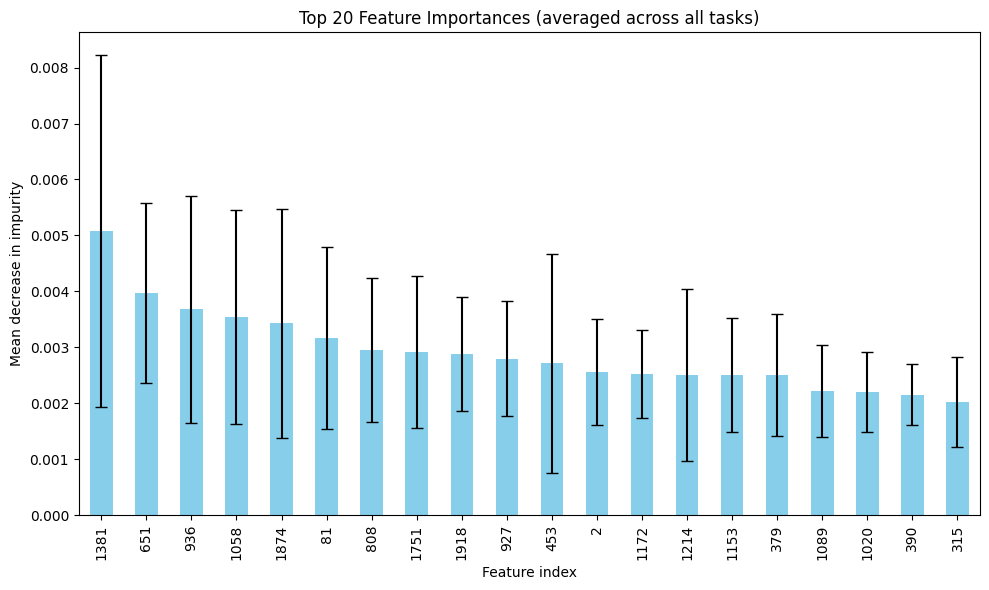

In [78]:
import matplotlib.pyplot as plt
feature_importances = np.array([est.feature_importances_ for est in multi_rf.estimators_])

# --- 2. Compute mean and std across tasks ---
mean_importance = np.mean(feature_importances, axis=0)
std_importance = np.std(feature_importances, axis=0)

# --- 3. Create DataFrame ---
importances = pd.DataFrame({
    "importance": mean_importance,
    "std": std_importance
})

# Optional: assign feature numbers (1, 2, 3, ...)
importances.index += 1

# --- 4. Select top 20 features ---
top_importances = importances.sort_values(by="importance", ascending=False).iloc[:20]

# --- 5. Plot ---
fig, ax = plt.subplots(figsize=(10, 6))
top_importances["importance"].plot.bar(
    yerr=top_importances["std"],
    ax=ax,
    color="skyblue",
    capsize=4
)
ax.set_title("Top 20 Feature Importances (averaged across all tasks)")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xlabel("Feature index")
fig.tight_layout()
plt.show()

We duplicate the number of estimators

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import numpy as np
import pandas as pd

# Define and train the model
base_rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

multi_rf = MultiOutputClassifier(base_rf, n_jobs=-1)
multi_rf.fit(X_train, y_train)

# Predict on validation set
y_pred_proba = np.zeros_like(y_valid, dtype=float)
y_pred_binary = np.zeros_like(y_valid, dtype=int)

for i, estimator in enumerate(multi_rf.estimators_):
    y_pred_proba[:, i] = estimator.predict_proba(X_valid)[:, 1]
    y_pred_binary[:, i] = (y_pred_proba[:, i] > 0.5).astype(int)

#Compute metrics per task
results = []

for i, task in enumerate(tasks):
    roc_auc = roc_auc_score(y_valid[:, i], y_pred_proba[:, i])
    f1 = f1_score(y_valid[:, i], y_pred_binary[:, i])
    acc = accuracy_score(y_valid[:, i], y_pred_binary[:, i])

    results.append({
        "Task": task,
        "ROC-AUC": roc_auc,
        "F1-score": f1,
        "Accuracy": acc
    })

# --- 4. Create summary DataFrame ---
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

# --- 5. Compute global averages ---
mean_metrics = results_df[["ROC-AUC", "F1-score", "Accuracy"]].mean().to_dict()
print("Average metrics across all tasks:")
for k, v in mean_metrics.items():
    print(f"{k}: {v:.3f}")


Average metrics across all tasks:
ROC-AUC: 0.601
F1-score: 0.639
Accuracy: 0.795


In [92]:
display(results_df.head(28))

,Task,ROC-AUC,F1-score,Accuracy
0,Nervous system disorders,0.765957,0.992958,0.986014
1,Eye disorders,0.737924,0.840336,0.734266
2,Immune system disorders,0.708813,0.878431,0.783217
3,Ear and labyrinth disorders,0.707746,0.593750,0.636364
4,Blood and lymphatic system disorders,0.674194,0.793103,0.664336
5,Reproductive system and breast disorders,0.659438,0.712766,0.622378
6,Endocrine disorders,0.651022,0.000000,0.811189
7,Skin and subcutaneous tissue disorders,0.638489,0.985816,0.972028
8,Hepatobiliary disorders,0.637952,0.732673,0.622378
9,Product issues,0.634752,0.000000,0.986014


Increasing n_estimators and controlling max_depth improves generalization, particularly for moderately frequent side effects. Particularly nervous system disorders seem to obtain a pretty good score

In [93]:
# --- 1. Predict on test set ---
y_pred_proba_test = np.zeros_like(y_test, dtype=float)
y_pred_binary_test = np.zeros_like(y_test, dtype=int)

for i, estimator in enumerate(multi_rf.estimators_):
    y_pred_proba_test[:, i] = estimator.predict_proba(X_test)[:, 1]
    y_pred_binary_test[:, i] = (y_pred_proba_test[:, i] > 0.5).astype(int)

# --- 2. Compute metrics per task ---
results_test = []

for i, task in enumerate(tasks):
    roc_auc = roc_auc_score(y_test[:, i], y_pred_proba_test[:, i])
    f1 = f1_score(y_test[:, i], y_pred_binary_test[:, i])
    acc = accuracy_score(y_test[:, i], y_pred_binary_test[:, i])

    results_test.append({
        "Task": task,
        "ROC-AUC": roc_auc,
        "F1-score": f1,
        "Accuracy": acc
    })

# --- 3. Create summary DataFrame ---
results_test_df = pd.DataFrame(results_test)
results_test_df = results_test_df.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

# --- 4. Compute average metrics ---
mean_metrics_test = results_test_df[["ROC-AUC", "F1-score", "Accuracy"]].mean().to_dict()
print("Average metrics on test set:")
for k, v in mean_metrics_test.items():
    print(f"{k}: {v:.3f}")

# --- 5. Display top results ---
display(results_test_df.head(27))

Average metrics on test set:
ROC-AUC: 0.635
F1-score: 0.641
Accuracy: 0.777


,Task,ROC-AUC,F1-score,Accuracy
0,Product issues,0.820144,0.000000,0.965035
1,Reproductive system and breast disorders,0.804931,0.754286,0.699301
2,Skin and subcutaneous tissue disorders,0.728710,0.978571,0.958042
3,Nervous system disorders,0.701493,0.967509,0.937063
4,Blood and lymphatic system disorders,0.701205,0.761468,0.636364
5,Eye disorders,0.694942,0.731481,0.594406
6,Gastrointestinal disorders,0.692837,0.963504,0.930070
7,Investigations,0.692444,0.932836,0.874126
8,Infections and infestations,0.688355,0.827869,0.706294
9,Renal and urinary disorders,0.688055,0.747748,0.608392


On the test set, the multi-output Random Forest achieved an average ROC-AUC of 0.635, indicating moderate predictive ability across 27 side-effect categories. The model performs best on moderately frequent side effects (e.g., reproductive, skin, nervous system), with ROC-AUCs up to 0.82. Rare side effects such as pregnancy, surgical procedures, and congenital disorders remain undetected, as reflected by F1-scores of zero and ROC-AUCs near or below 0.5. High accuracy values for these tasks are still misleading due to extreme class imbalance.

The best results are obtained on

Reproductive system & breast: Good discrimination; model can identify positive side effects reasonably well.

Skin & subcutaneous tissue:	High F1 and accuracy; likely majority-negative class dominates, but ROC-AUC confirms moderate discriminative ability.

Nervous system disorders:	Model predicts positives well; ROC-AUC above 0.7 indicates reasonable ranking.

Gastrointestinal disorders: Similar pattern: high F1 due to majority class, ROC-AUC shows moderate predictive power.

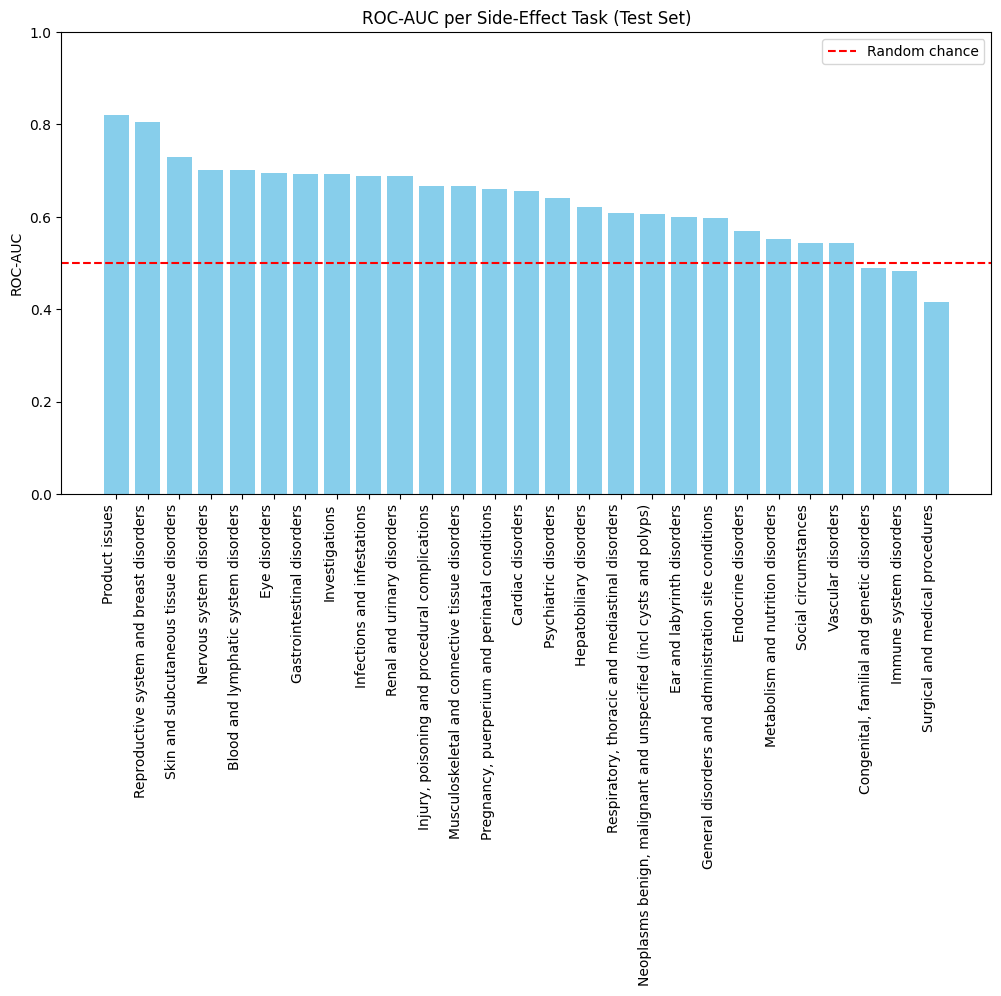

In [96]:
import matplotlib.pyplot as plt

# Sort tasks by ROC-AUC for better visualization
roc_sorted = results_test_df.sort_values(by="ROC-AUC", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(roc_sorted["Task"], roc_sorted["ROC-AUC"], color="skyblue")
plt.axhline(0.5, color="red", linestyle="--", label="Random chance")
plt.xticks(rotation=90, ha="right")
plt.ylim(0, 1)
plt.ylabel("ROC-AUC")
plt.title("ROC-AUC per Side-Effect Task (Test Set)")
plt.legend()
plt.show()
